# Communicate Data Findings

## Introduction

> * This project is an analysis into farmer's data to investigate drivers of yield at different stages of the farming process.


### Data Description

> The data is a 3-worksheet `.xlsx file` consisting of 3 worksheets, namely:
> * **box_placement:**
> * **wet_harvest:**
> * **dry_harvest:**

> The data has been gathered to an xlsx spreadsheet and therefore we proceed to assessment, cleaning, and analysis.

*  * **Assumptions**

> * Dry weight of wheat is about 85.7% of wet weight, by the proportion of mean of both wet and dry weights calculation.

> * We import the required analysis libraries and load the data to the notebook

In [1]:
# We import all the required libraries to enable analysis in the project.
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
#We define the file path to the excel file we are to use.
xls_path = pd.ExcelFile(r'C:\Users\USER\pula_data_assessment/agricultural_data.xlsx')

# Assessment stage

In [3]:
#We load the data from sheet 1 with the data from the box placement forms and view it
box_placement = pd.read_excel(xls_path, 'box_placement')
box_placement.head()

,client_name,distance_to_water_body,enumerator_comment,expected_harvest_date,farmer_in_list_or_control,farmer_state_district,field_irrigated,insured_crop,intercropping,other_factors_that_affected_germination,...,herbicide_applied_box1,box1_cause_of_flood,box1_flood_occurence_date,box2_flood_occurence_date,other_causes_of_weeds_box1,other_causes_of_weeds_box2,latitude,longitude,altitude,accuracy
0,A,0-5KM,Done,2022-05-27,farmer_listed,Katsina,no,wheat,no,insufficient water for watering,...,NaN,NaN,NaT,NaT,NaN,NaN,11.367974,7.568032,717.83,6.16
1,A,More_than_5_KM,successfuly done,2022-05-27,control_farmer,Katsina,no,wheat,no,insufficient watering.,...,NaN,NaN,NaT,NaT,NaN,NaN,11.367970,7.567983,696.77,4.25
2,A,More_than_5_KM,ok,2022-06-08,control_farmer,Zamfara,no,wheat,no,rain,...,NaN,NaN,NaT,NaT,NaN,NaN,12.046592,6.640337,65.00,1.00
3,A,More_than_5_KM,ok,2022-06-06,control_farmer,Zamfara,no,wheat,no,soil factor,...,NaN,NaN,NaT,NaT,NaN,NaN,12.046592,6.640337,65.00,3.90
4,A,More_than_5_KM,ok,2022-06-16,control_farmer,Zamfara,no,wheat,no,soil factor,...,NaN,NaN,NaT,NaT,NaN,NaN,12.051899,6.640011,65.00,1.00


In [4]:
#We load the data from sheet 2 with the data from the wet harvest weight forms
wet_harvest = pd.read_excel(xls_path, 'wet_harvest')
wet_harvest.head()

,@case_id,box1_harvest_possible,box2_harvest_possible,enumerator_comment,farmer_verified,box1_wet_weight,box1_wet_weight_confirmation,box2_wet_weight,box2_wet_weight_confirmation,timeEnd,...,box_2_non_compliance_confirmation,why_unable_to_capture_box2_weight,why_no_crop_survived_in_box1,why_no_crop_survived_in_box2,username,wet_harvest_comment,latitude,longitude,altitude,accuracy
0,9d1a878b-ea56-423a-83a5-dce4eee21302,yes,yes,ok,farmer_verified,3.375,3.375,3.250,3.250,2022-06-04T10:26:17.390000Z,...,NaN,NaN,NaN,NaN,nig040,ok,12.138754,6.686328,107.0,1.26
1,ebf9955c-d21e-434a-80d7-658a2cecd0bf,yes,yes,ok,farmer_verified,1.765,1.765,1.825,1.825,2022-06-04T10:13:45.347000Z,...,NaN,NaN,NaN,NaN,nig040,ok,12.138754,6.686328,107.0,1.22
2,eb5f0cf1-0814-48af-94be-62b5dc2524a9,yes,yes,ok,farmer_verified,2.920,2.920,2.835,2.835,2022-06-04T09:53:46.136000Z,...,NaN,NaN,NaN,NaN,nig040,ok,12.138754,6.686328,107.0,1.69
3,79880c35-bb12-4089-8f06-3927b6c44875,yes,yes,ok,farmer_verified,2.835,2.835,2.640,2.640,2022-06-04T09:23:13.166000Z,...,NaN,NaN,NaN,NaN,nig040,ok,12.138754,6.686328,107.0,1.64
4,5d8d55c6-9514-495f-a629-21fd17b92c77,yes,yes,ok,farmer_verified,3.215,3.215,3.315,3.315,2022-06-04T10:26:42.456000Z,...,NaN,NaN,NaN,NaN,nig040,ok,12.138754,6.686328,107.0,1.48


In [5]:
#We load the data from sheet 3 with the data from the dry harvest weight forms
dry_harvest = pd.read_excel(xls_path, 'dry_harvest')
dry_harvest.head(3)

,@case_id,did_the_farmer_keep_the_crops_in_separate_bags,enumerator_comment,farmer_verified,box1_dry_weight,box1_dry_weight_confirmation,box2_dry_weight,box2_dry_weight_confirmation,was_anything_added_or_removed_from_the_harvest_bag,timeEnd,timeStart,cannot_proceed_with_dry_harvest,username,dry_harvest_comment,latitude,longitude,altitude,accuracy
0,9d1a878b-ea56-423a-83a5-dce4eee21302,yes,ok,farmer_verified,3.250,3.250,3.150,3.150,no,2022-06-04T10:29:47.353000Z,2022-06-04T10:26:43.768000Z,NaN,nig040,ok,12.138754,6.686328,107.0,1.27
1,ebf9955c-d21e-434a-80d7-658a2cecd0bf,yes,ok,farmer_verified,1.660,1.660,1.735,1.735,no,2022-06-04T10:21:12.662000Z,2022-06-04T10:13:51.524000Z,NaN,nig040,ok,12.138754,6.686328,107.0,1.57
2,eb5f0cf1-0814-48af-94be-62b5dc2524a9,yes,ok,farmer_verified,2.805,2.805,2.770,2.770,no,2022-06-04T09:56:59.356000Z,2022-06-04T09:53:54.372000Z,NaN,nig040,ok,12.138754,6.686328,107.0,1.24


## Datasets Merger:

> > * We merge the datasets to use in our analysis

In [6]:
# We do a union merger of the box_placement and wet_harvest datasets on the @case_id and add suffixes _box and _wet for columns with commin values
box_and_wet = pd.merge(box_placement,wet_harvest,on = '@case_id',how = 'outer',suffixes = ('_box','_wet'))
box_and_wet.shape

(2356, 104)

In [7]:
box_and_wet.head(4)

,client_name,distance_to_water_body,enumerator_comment_box,expected_harvest_date,farmer_in_list_or_control,farmer_state_district,field_irrigated,insured_crop,intercropping,other_factors_that_affected_germination,...,box_2_non_compliance_confirmation,why_unable_to_capture_box2_weight,why_no_crop_survived_in_box1,why_no_crop_survived_in_box2,username_wet,wet_harvest_comment,latitude_wet,longitude_wet,altitude_wet,accuracy_wet
0,A,0-5KM,Done,2022-05-27,farmer_listed,Katsina,no,wheat,no,insufficient water for watering,...,NaN,NaN,NaN,NaN,nig187,Done,11.367886,7.568027,694.28,4.73
1,A,More_than_5_KM,successfuly done,2022-05-27,control_farmer,Katsina,no,wheat,no,insufficient watering.,...,NaN,NaN,NaN,NaN,nig187,Done,11.368021,7.568042,712.78,3.90
2,A,More_than_5_KM,ok,2022-06-08,control_farmer,Zamfara,no,wheat,no,rain,...,NaN,NaN,NaN,NaN,nig040,ok,12.147570,6.714653,107.00,1.51
3,A,More_than_5_KM,ok,2022-06-06,control_farmer,Zamfara,no,wheat,no,soil factor,...,NaN,NaN,NaN,NaN,nig040,ok,12.138754,6.686328,107.00,1.21


In [8]:
# We do a union merge of the dry harvest data form and the data containing box placement 
box_and_wet_and_dry = pd.merge(box_and_wet,dry_harvest,on = '@case_id',how = 'outer')
box_and_wet_and_dry.shape

(2356, 121)

In [9]:
# We use code to view if the merge was successful
box_and_wet_and_dry.head(4)

,client_name,distance_to_water_body,enumerator_comment_box,expected_harvest_date,farmer_in_list_or_control,farmer_state_district,field_irrigated,insured_crop,intercropping,other_factors_that_affected_germination,...,was_anything_added_or_removed_from_the_harvest_bag,timeEnd,timeStart,cannot_proceed_with_dry_harvest,username,dry_harvest_comment,latitude,longitude,altitude,accuracy
0,A,0-5KM,Done,2022-05-27,farmer_listed,Katsina,no,wheat,no,insufficient water for watering,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,More_than_5_KM,successfuly done,2022-05-27,control_farmer,Katsina,no,wheat,no,insufficient watering.,...,no,2022-05-27T11:09:45.357000Z,2022-05-27T10:56:36.195000Z,NaN,nig187,Done,11.368059,7.568079,721.23,8.00
2,A,More_than_5_KM,ok,2022-06-08,control_farmer,Zamfara,no,wheat,no,rain,...,no,2022-06-01T11:25:45.374000Z,2022-06-01T11:18:01.603000Z,NaN,nig040,ok,12.147570,6.714653,107.00,1.49
3,A,More_than_5_KM,ok,2022-06-06,control_farmer,Zamfara,no,wheat,no,soil factor,...,no,2022-06-01T10:41:21.419000Z,2022-06-01T10:36:22.089000Z,NaN,nig040,ok,12.138754,6.686328,107.00,1.47


In [10]:
#we rename the box_and_wet_and_dry data as raw_crop_merged_data
raw_crop_merged_data = box_and_wet_and_dry

In [11]:
#create a merged data frame
merged_data = raw_crop_merged_data
merged_data.head(4)

,client_name,distance_to_water_body,enumerator_comment_box,expected_harvest_date,farmer_in_list_or_control,farmer_state_district,field_irrigated,insured_crop,intercropping,other_factors_that_affected_germination,...,was_anything_added_or_removed_from_the_harvest_bag,timeEnd,timeStart,cannot_proceed_with_dry_harvest,username,dry_harvest_comment,latitude,longitude,altitude,accuracy
0,A,0-5KM,Done,2022-05-27,farmer_listed,Katsina,no,wheat,no,insufficient water for watering,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,More_than_5_KM,successfuly done,2022-05-27,control_farmer,Katsina,no,wheat,no,insufficient watering.,...,no,2022-05-27T11:09:45.357000Z,2022-05-27T10:56:36.195000Z,NaN,nig187,Done,11.368059,7.568079,721.23,8.00
2,A,More_than_5_KM,ok,2022-06-08,control_farmer,Zamfara,no,wheat,no,rain,...,no,2022-06-01T11:25:45.374000Z,2022-06-01T11:18:01.603000Z,NaN,nig040,ok,12.147570,6.714653,107.00,1.49
3,A,More_than_5_KM,ok,2022-06-06,control_farmer,Zamfara,no,wheat,no,soil factor,...,no,2022-06-01T10:41:21.419000Z,2022-06-01T10:36:22.089000Z,NaN,nig040,ok,12.138754,6.686328,107.00,1.47


## Selection of columns to analyze:

> Due to the nature of the dataset, we index columns relevant to the goal of the analysis.

In [12]:
#We use code to view the 1st 100 column names
merged_data.columns[:100]

Index(['client_name', 'distance_to_water_body', 'enumerator_comment_box',
       'expected_harvest_date', 'farmer_in_list_or_control',
       'farmer_state_district', 'field_irrigated', 'insured_crop',
       'intercropping', 'other_factors_that_affected_germination',
       'planting_date', 'success_box1', 'success_box2',
       'ward_lga_subcounty_camp', 'box1_crop_condition',
       'box1_crop_stands_per_square_meter', 'box1_dim_8_by_5', 'box1_length',
       'box1_mode_of_planting', 'box1_other_issues_occurrence_date',
       'box1_other_problems', 'box1_problem', 'box1_secondary_issues',
       'box1_width', 'box2_crop_condition',
       'box2_crop_stands_per_square_meter', 'box2_dim_8_by_5', 'box2_length',
       'box2_mode_of_planting', 'box2_other_issues_occurrence_date',
       'box2_other_problems', 'box2_problem', 'box2_secondary_issues',
       'box2_width', '@case_id', 'timeEnd_box', 'timeStart_box',
       'type_of_pests_or_diseases_current_crop_stage',
       'what_steps

In [13]:
#We use code to view the remaining columns of the data
merged_data.columns[99:]

Index(['wet_harvest_comment', 'latitude_wet', 'longitude_wet', 'altitude_wet',
       'accuracy_wet', 'did_the_farmer_keep_the_crops_in_separate_bags',
       'enumerator_comment', 'farmer_verified_y', 'box1_dry_weight',
       'box1_dry_weight_confirmation', 'box2_dry_weight',
       'box2_dry_weight_confirmation',
       'was_anything_added_or_removed_from_the_harvest_bag', 'timeEnd',
       'timeStart', 'cannot_proceed_with_dry_harvest', 'username',
       'dry_harvest_comment', 'latitude', 'longitude', 'altitude', 'accuracy'],
      dtype='object')

### Listing of all column names:
> * **all_column_names** = \['client_name', 'distance_to_water_body', 'enumerator_comment_box',
       'expected_harvest_date', 'farmer_in_list_or_control',
       'farmer_state_district', 'field_irrigated', 'insured_crop',
       'intercropping', 'other_factors_that_affected_germination',
       'planting_date', 'success_box1', 'success_box2',
       'ward_lga_subcounty_camp', 'box1_crop_condition',
       'box1_crop_stands_per_square_meter', 'box1_dim_8_by_5', 'box1_length',
       'box1_mode_of_planting', 'box1_other_issues_occurrence_date',
       'box1_other_problems', 'box1_problem', 'box1_secondary_issues',
       'box1_width', 'box2_crop_condition',
       'box2_crop_stands_per_square_meter', 'box2_dim_8_by_5', 'box2_length',
       'box2_mode_of_planting', 'box2_other_issues_occurrence_date',
       'box2_other_problems', 'box2_problem', 'box2_secondary_issues',
       'box2_width', '@case_id', 'timeEnd_box', 'timeStart_box',
       'type_of_pests_or_diseases_current_crop_stage',
       'what_steps_did_the_farmer_take_to_mitigate_the_pests_or_diseases',
       'why_unable_to_place_box1', 'type_of_irrigation_system', 'box1_rows',
       'measurement_box1_row1', 'measurement_box1_row2',
       'measurement_box1_row3', 'box2_rows', 'measurement_box2_row1',
       'measurement_box2_row2', 'measurement_box2_row3',
       'box1_drought_occurence_date', 'box1_locust_infestation_date',
       'box2_drought_occurence_date', 'box2_locust_infestation_date',
       'box1_other_pest_disease_occurence_date',
       'box1_pests_or_diseases_mitigation', 'box1_type_of_pests_or_diseases',
       'box2_other_pest_disease_occurence_date',
       'box2_pests_and_diseases_mitigation', 'box2_type_of_pests_or_diseases',
       'how_is_the_other_crop_planted', 'other_crops_names',
       'box1_animal_encroachment_date', 'box2_animal_encroachment_date',
       'causes_of_weeds_box2', 'weeds_mitigation_box2',
       'other_crops_not_listed', 'causes_of_weeds_box1',
       'weeds_mitigation_box1', 'why_unable_to_place_box2', 'username_box',
       'box_placement_comment', 'herbicide_applied_box1',
       'box1_cause_of_flood', 'box1_flood_occurence_date',
       'box2_flood_occurence_date', 'other_causes_of_weeds_box1',
       'other_causes_of_weeds_box2', 'latitude_box', 'longitude_box',
       'altitude_box', 'accuracy_box', 'box1_harvest_possible',
       'box2_harvest_possible', 'enumerator_comment_wet', 'farmer_verified_x',
       'box1_wet_weight', 'box1_wet_weight_confirmation', 'box2_wet_weight',
       'box2_wet_weight_confirmation', 'timeEnd_wet', 'timeStart_wet',
       'cannot_proceed_with_wet_harvest', 'box_1_non_compliance_confirmation',
       'why_unable_to_capture_box1_weight',
       'box_2_non_compliance_confirmation',
       'why_unable_to_capture_box2_weight', 'why_no_crop_survived_in_box1',
       'why_no_crop_survived_in_box2', 'username_wet', 'wet_harvest_comment','latitude_wet', 'longitude_wet', 'altitude_wet',
       'accuracy_wet', 'did_the_farmer_keep_the_crops_in_separate_bags',
       'enumerator_comment', 'farmer_verified_y', 'box1_dry_weight',
       'box1_dry_weight_confirmation', 'box2_dry_weight',
       'box2_dry_weight_confirmation',
       'was_anything_added_or_removed_from_the_harvest_bag', 'timeEnd',
       'timeStart', 'cannot_proceed_with_dry_harvest', 'username',
       'dry_harvest_comment', 'latitude', 'longitude', 'altitude', 'accuracy']

### Subset columns:

> > * In our analysis, we seek to investigate the factors that affect the yield. Inthat, we seek to choose the most relevant yield drivers.

> > * **relevant_columns** =  \['client_name', 'distance_to_water_body', 'farmer_in_list_or_control',
       'farmer_state_district', 'field_irrigated', 'insured_crop', 'intercropping', 'box1_mode_of_planting','box2_mode_of_planting',
       '@case_id', 'type_of_pests_or_diseases_current_crop_stage',
       'what_steps_did_the_farmer_take_to_mitigate_the_pests_or_diseases',
       'type_of_irrigation_system', 'other_crops_names', 'username_box', 'herbicide_applied_box1', 'latitude_box',    'longitude_box', 'altitude_box', 'accuracy_box', 'box1_wet_weight', 'box1_wet_weight_confirmation', 'box2_wet_weight',      'box2_wet_weight_confirmation', 'username_wet', 'latitude_wet', 'longitude_wet', 'altitude_wet',
       'accuracy_wet', 'did_the_farmer_keep_the_crops_in_separate_bags', 'farmer_verified_y', 'box1_dry_weight', 'box1_dry_weight_confirmation', 'box2_dry_weight', 'box2_dry_weight_confirmation', 'latitude', 'longitude', 'altitude', 'accuracy']

## Selection of columns and storage: merged_data_to_analyze

In [14]:
#We use code to select the columns required for analysis
merged_data_to_analyze = merged_data[['client_name', 'distance_to_water_body', 'farmer_in_list_or_control',
                                       'farmer_state_district', 'field_irrigated', 'insured_crop', 
                                      'intercropping', 'box1_mode_of_planting', 'box2_mode_of_planting', '@case_id',
                                      'type_of_irrigation_system', 'other_crops_names', 'username_box', 
                                      'latitude_box',    'longitude_box', 'altitude_box', 
                                      'accuracy_box', 'box1_wet_weight', 'box1_wet_weight_confirmation', 
                                      'box2_wet_weight',      'box2_wet_weight_confirmation', 'username_wet', 
                                      'latitude_wet', 'longitude_wet', 'altitude_wet', 'accuracy_wet', 
                                      'did_the_farmer_keep_the_crops_in_separate_bags', 'farmer_verified_y', 
                                      'box1_dry_weight', 'box1_dry_weight_confirmation', 'box2_dry_weight', 
                                      'box2_dry_weight_confirmation', 'latitude', 'longitude', 'altitude', 'accuracy']]

In [15]:
#We use code to view the data shape
merged_data_to_analyze.shape

(2356, 36)

In [16]:
#We use code to view the first lines
merged_data_to_analyze.head()

,client_name,distance_to_water_body,farmer_in_list_or_control,farmer_state_district,field_irrigated,insured_crop,intercropping,box1_mode_of_planting,box2_mode_of_planting,@case_id,...,did_the_farmer_keep_the_crops_in_separate_bags,farmer_verified_y,box1_dry_weight,box1_dry_weight_confirmation,box2_dry_weight,box2_dry_weight_confirmation,latitude,longitude,altitude,accuracy
0,A,0-5KM,farmer_listed,Katsina,no,wheat,no,broadcasted,broadcasted,b8a79a54-442e-4d79-9656-65af4e6c5733,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,More_than_5_KM,control_farmer,Katsina,no,wheat,no,broadcasted,broadcasted,36311aa7-29d1-4650-a230-830bcd565d72,...,yes,farmer_verified,5.630,5.630,3.760,3.760,11.368059,7.568079,721.23,8.00
2,A,More_than_5_KM,control_farmer,Zamfara,no,wheat,no,broadcasted,broadcasted,0a9e2724-59e1-48cd-ab48-856dce787fec,...,yes,farmer_verified,2.690,2.690,2.720,2.720,12.147570,6.714653,107.00,1.49
3,A,More_than_5_KM,control_farmer,Zamfara,no,wheat,no,broadcasted,broadcasted,da9f7363-2415-415e-8cef-d6bb18ed2bc0,...,yes,farmer_verified,2.185,2.185,2.520,2.520,12.138754,6.686328,107.00,1.47
4,A,More_than_5_KM,control_farmer,Zamfara,no,wheat,no,broadcasted,broadcasted,9a14fb60-c3a6-4794-9f92-e84953db4b32,...,yes,farmer_verified,3.155,3.155,3.135,3.135,12.138754,6.686328,107.00,1.48


In [17]:
#We use code to view the data types in the dataframe
print(merged_data_to_analyze.dtypes)

client_name                                        object
distance_to_water_body                             object
farmer_in_list_or_control                          object
farmer_state_district                              object
field_irrigated                                    object
insured_crop                                       object
intercropping                                      object
box1_mode_of_planting                              object
box2_mode_of_planting                              object
@case_id                                           object
type_of_irrigation_system                          object
other_crops_names                                  object
username_box                                       object
latitude_box                                      float64
longitude_box                                     float64
altitude_box                                      float64
accuracy_box                                      float64
box1_wet_weigh

## What is the structure of your Dataset?

> There are 2356 farmers with 39 characteristics. Most variables are numeric in nature, but farmer district,insured crop,box_1_problem, box2_problem are categorical variables.

### What is/are the main feature(s) of interest in your dataset?

> I am interested in figuring out what features are most relevant in predicting yields for different regions.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I was thinking that the distance from water body has the highest impact to the yield.

# Data Assessment

In [18]:
# We load the focused assessment data.
raw_focused_data = merged_data_to_analyze

# Visual assessment:

> In this stage we use visual assessment to find quality and tidiness issues with the data.

In [19]:
# View samples from the data
raw_focused_data.sample(20).T

,1301,476,2068,1396,497,680,1284,579,119,369,1118,1925,1463,1061,1109,1953,768,1055,216,597
client_name,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A
distance_to_water_body,0-5KM,0-5KM,0-5KM,0-5KM,0-5KM,0-5KM,0-5KM,0-5KM,0-5KM,More_than_5_KM,0-5KM,0-5KM,0-5KM,0-5KM,0-5KM,0-5KM,More_than_5_KM,0-5KM,More_than_5_KM,0-5KM
farmer_in_list_or_control,farmer_listed,farmer_listed,farmer_listed,control_farmer,farmer_listed,control_farmer,farmer_listed,control_farmer,control_farmer,farmer_listed,farmer_listed,farmer_listed,farmer_listed,control_farmer,control_farmer,farmer_listed,farmer_listed,farmer_listed,farmer_listed,farmer_listed
farmer_state_district,Niger,Gombe,Bauchi,Niger,Gombe,Sokoto,Borno,Jigawa,Kaduna,Borno,Niger,Bauchi,Gombe,Kaduna,Kaduna,Bauchi,Zamfara,Adamawa,Bauchi,Sokoto
field_irrigated,yes,yes,no,yes,yes,yes,yes,yes,yes,yes,no,yes,yes,no,yes,yes,no,no,yes,no
insured_crop,wheat,wheat,wheat,wheat,wheat,wheat,wheat,wheat,wheat,wheat,wheat,wheat,wheat,wheat,wheat,wheat,wheat,wheat,wheat,wheat
intercropping,no,no,no,no,no,yes,no,no,no,no,no,yes,no,no,no,no,no,no,no,no
box1_mode_of_planting,rows,broadcasted,broadcasted,rows,broadcasted,broadcasted,broadcasted,rows,rows,broadcasted,rows,rows,broadcasted,broadcasted,rows,rows,broadcasted,rows,broadcasted,broadcasted
box2_mode_of_planting,rows,broadcasted,broadcasted,rows,broadcasted,broadcasted,broadcasted,rows,rows,broadcasted,rows,rows,broadcasted,broadcasted,rows,rows,broadcasted,rows,broadcasted,broadcasted
@case_id,ec007bd1-2897-440e-a927-2c6f647221ce,e05a35a3-6c69-4af6-8f69-d63495b1101e,93b9cff2-e1bb-4f8e-a73b-200c85a4f4d8,12700337-c807-408a-a209-9a56c04be956,9923df43-9f41-4c78-86d3-99750e49160a,a475b5ec-a16f-4583-bc48-5b6b557b3c8d,a30a8c77-b69c-4691-979c-3dbb70a726ed,4e23ce2a-62b3-4702-9018-d4fa37ff77bf,8633216b-f957-48f0-b3b7-281ae3a21b38,9d76a199-19a9-4ac8-9cb6-a98e08acdadd,df1a5931-e1ce-4e2c-ad43-5b0b713590ea,16fafea9-8ce0-471e-9593-98e40c323400,fe20ac9b-25b5-4e6e-bfba-163bcfcc4b7a,82456d0a-05ec-4819-9f0e-e61d5b2c1702,e89fdbe0-a6f7-4979-9a36-8513c1650548,c4655b39-27f1-4a7f-83dc-cd9ca4997acd,50d6ed1d-a0c8-41e8-aee4-11e083910289,de34ebd4-7d59-4d93-bbba-e74d3df2d09f,310fc379-2e9a-458a-bb77-19b976a1f8e2,c28de0fe-31f8-40c1-8043-e7a8f19a62ad


#### Assessment issues:

> **Quality issues**

> > * Q-2: Some values for latitude and longitude are not consistent for the 3 datasets

> **Tidiness issues**
> > T-1: originally common columns contin data in 3 different columns instead of one.
> > T-3: There needs to be a column for confirmed box lengths

In [20]:
#Use code to count the crops
raw_focused_data.insured_crop.value_counts()

wheat    2356
Name: insured_crop, dtype: int64

### Programmatic assessment

In [21]:
#View information about the dataframe
raw_focused_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   client_name                                     2356 non-null   object 
 1   distance_to_water_body                          2297 non-null   object 
 2   farmer_in_list_or_control                       2356 non-null   object 
 3   farmer_state_district                           2356 non-null   object 
 4   field_irrigated                                 2297 non-null   object 
 5   insured_crop                                    2356 non-null   object 
 6   intercropping                                   2356 non-null   object 
 7   box1_mode_of_planting                           2244 non-null   object 
 8   box2_mode_of_planting                           2242 non-null   object 
 9   @case_id                                 

In [22]:
#We use code to find where the dry weights are greater than wet weights
box_1_invalid_dry_weights = raw_focused_data.query('box1_dry_weight > box1_wet_weight')[['username_box','box1_dry_weight','box1_wet_weight','box1_dry_weight_confirmation','box1_wet_weight_confirmation']]
box_1_invalid_dry_weights

,username_box,box1_dry_weight,box1_wet_weight,box1_dry_weight_confirmation,box1_wet_weight_confirmation
40,nig039,2.225,1.230,2.225,1.230
62,nig188,0.370,0.190,0.370,0.190
157,nig108,5.325,5.260,5.325,5.260
231,nig187,3.900,3.750,3.900,3.750
289,nig187,6.570,4.945,6.570,4.945
...,...,...,...,...,...
2186,nig031,7.470,7.090,7.470,7.090
2232,nig026,5.270,5.075,5.270,5.075
2284,nig031,5.825,4.265,5.825,4.265
2287,nig031,7.190,3.265,7.190,3.265


In [23]:
#We use code to view rankings of enumerators who submit invalid data, by the dry weights greater than wet weights
box_1_invalid_dry_weights['username_box'].value_counts()[:12]

nig099    12
nig106     7
nig098     7
nig090     5
nig097     5
nig031     3
nig187     3
nig026     3
nig168     3
nig033     2
nig030     2
nig028     2
Name: username_box, dtype: int64

In [24]:
#We use code to find where the dry weights are greater than wet weights
box_2_invalid_dry_weights = raw_focused_data.query('box2_dry_weight > box2_wet_weight')[['username_box','box2_dry_weight','box2_wet_weight','box2_dry_weight_confirmation','box2_wet_weight_confirmation']]
box_2_invalid_dry_weights

,username_box,box2_dry_weight,box2_wet_weight,box2_dry_weight_confirmation,box2_wet_weight_confirmation
56,nig099,4.470,3.520,4.470,3.520
138,nig168,9.630,8.870,9.630,8.870
150,nig108,1.500,1.425,1.500,1.425
154,nig108,5.310,5.275,5.310,5.275
155,nig108,5.335,5.225,5.335,5.225
...,...,...,...,...,...
2283,nig031,7.265,5.345,7.265,5.345
2285,nig031,7.245,3.520,7.245,3.520
2305,nig031,6.875,4.800,6.875,4.800
2312,nig030,4.605,2.665,4.605,2.665


In [25]:
#We use code to view rankings of enumerators who submit invalid data, by the dry weights greater than wet weights
box_2_invalid_dry_weights['username_box'].value_counts()[:12]

nig099    12
nig106     9
nig031     5
nig097     5
nig098     5
nig090     5
nig183     3
nig102     3
nig108     3
nig030     3
nig033     3
nig168     3
Name: username_box, dtype: int64

In [26]:
# We use code to view data where we have wet weight value, but missing dry weights value for box 1
raw_focused_data.query('box1_wet_weight.notnull() & box1_dry_weight.isna()')[['box1_wet_weight','box1_dry_weight']]

,box1_wet_weight,box1_dry_weight
0,8.580,NaN
66,3.590,NaN
67,2.665,NaN
68,3.300,NaN
88,2.395,NaN
89,3.525,NaN
91,3.385,NaN
92,2.620,NaN
97,7.035,NaN
350,5.350,NaN


In [27]:
# We use code to view data where we have wet weight value, but missing dry weights value for box 2
raw_focused_data.query('box2_wet_weight.notnull() & box2_dry_weight.isna()')[['box2_wet_weight','box2_dry_weight']]

,box2_wet_weight,box2_dry_weight
0,3.740,NaN
66,3.785,NaN
67,2.355,NaN
68,3.420,NaN
88,3.020,NaN
89,3.559,NaN
91,2.825,NaN
92,3.110,NaN
97,7.350,NaN
350,6.620,NaN


In [28]:
# We find the average proportion of dry weights to wet weights for wheat using proportion of means
((raw_focused_data.box1_dry_weight.mean()+raw_focused_data.box2_dry_weight.mean()))/(raw_focused_data.box1_wet_weight.mean()+raw_focused_data.box2_wet_weight.mean())

0.8571994164633013

In [29]:
# We find missing values of wet weight that have a dry weight of 0 for box 1
raw_focused_data.query('box1_wet_weight.isna() & box1_dry_weight == "0"')[['box1_wet_weight','box1_dry_weight']]

,box1_wet_weight,box1_dry_weight


In [30]:
# We find missing values of wet weight that have a dry weight of 0 for box 2
raw_focused_data.query('box2_wet_weight.isna() & box2_dry_weight.notna()')[['box2_wet_weight','box2_dry_weight']]

,box2_wet_weight,box2_dry_weight


In [31]:
#We check to see whether dry weights match dry weights confirmation for all values
(raw_focused_data.box2_dry_weight == raw_focused_data.box2_dry_weight_confirmation).value_counts()

True     2093
False     263
dtype: int64

Q-x: There are falsely missing dry values, since wet produce does not dry to 0
Q-x: The weights differ from the confirmed weights.

## Assessment summary

> **Quality issues**

> > * Q-1 Extra unnecesary columns, order of columns is not the best
> > * Q-2: Some values for latitude and longitude are not consistent for the 3 datasets
> > * Q-3: There is need for a yields column
> > * Q-4: Box 1 dry weights has values which are greater than the corresponding wet weights
> > * Q-5: Box 2 dry weights has values which are greater than the corresponding wet weights
> > * Q-6: Box 1 dry weights has values which have wet weights but no dry weights hence wrongfully missing
> > * Q-7: Box 2 dry weights has values which have wet weights but no dry weights hence wrongfully missing
> > * Q-8: There is a mismatch of weights and their confirmed weights

> **Tidiness issues**
> > T-1: originally common columns contin data in 3 different columns instead of one.
> > T-3: There needs to be a column for confirmed box lengths

# Data Cleaning

# Issue Q-6 and Q-7:

> > * Q-6: Box 1 dry weights has values which have wet weights but no dry weights hence wrongfully missing
> > * Q-7: Box 2 dry weights has values which have wet weights but no dry weights hence wrongfully missing

### Define:

For both values we use the calculated estimate proportion to fill the missing values

### Code

In [32]:
#calculate and fill missing values for wrongly missing box1 dry weights
for i in raw_focused_data.query('box1_wet_weight.notnull() & box1_dry_weight.isna()')[['box1_wet_weight','box1_dry_weight']].index:
    raw_focused_data.loc[i,'box1_dry_weight'] = raw_focused_data.loc[i,'box1_wet_weight']*0.8571994164633013


In [33]:
#calculate and fill missing values for wrongly missing box1 dry weights
for i in raw_focused_data.query('box2_wet_weight.notnull() & box2_dry_weight.isna()')[['box2_wet_weight','box2_dry_weight']].index:
    raw_focused_data.loc[i,'box2_dry_weight'] = raw_focused_data.loc[i,'box2_wet_weight']*0.8571994164633013


## Test

In [34]:
# We confirm if the dry weights have been filled for box 2
raw_focused_data.query('box2_wet_weight.notnull() & box2_dry_weight.isna()')[['box2_wet_weight','box2_dry_weight']]

,box2_wet_weight,box2_dry_weight


In [35]:
# We confirm if the dry weights have been filled for box 1
raw_focused_data.query('box1_wet_weight.notnull() & box1_dry_weight.isna()')[['box1_wet_weight','box1_dry_weight']]

,box1_wet_weight,box1_dry_weight


Both missing values have been filled.

### Issue Q-8 and Q-9:

> > * Q-8: There is a mismatch of weights and their confirmed weights
> > * Q-9: There is need for a yields column

### Define:

> > * Due to the difference in confirmed weights and weights, we assume confirmed weights are correct and use them to fill yields column

### Code:

In [36]:
#Find entries where box 1 dry weights are not equal to their confirmation and either the 
#box1 dry weight or the confirmation has an entry
raw_focused_data.query('(box1_dry_weight_confirmation != box1_dry_weight) & (box1_dry_weight_confirmation.notna()| box1_dry_weight.notna())')[['box1_dry_weight','box1_dry_weight_confirmation']]

,box1_dry_weight,box1_dry_weight_confirmation
0,7.354771,NaN
66,3.077346,NaN
67,2.284436,NaN
68,2.828758,NaN
88,2.052993,NaN
89,3.021628,NaN
91,2.901620,NaN
92,2.245862,NaN
97,6.030398,NaN
350,4.586017,NaN


> Confirmed the difference is due to skipped confirmation and is nor erroneous.

In [37]:
#We compute yields
raw_focused_data['yield_kgs'] = (raw_focused_data.box1_dry_weight+raw_focused_data.box2_dry_weight)

### Test

In [38]:
#Test if successful in computation of yields
raw_focused_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   client_name                                     2356 non-null   object 
 1   distance_to_water_body                          2297 non-null   object 
 2   farmer_in_list_or_control                       2356 non-null   object 
 3   farmer_state_district                           2356 non-null   object 
 4   field_irrigated                                 2297 non-null   object 
 5   insured_crop                                    2356 non-null   object 
 6   intercropping                                   2356 non-null   object 
 7   box1_mode_of_planting                           2244 non-null   object 
 8   box2_mode_of_planting                           2242 non-null   object 
 9   @case_id                                 

### Issue Q-4 and Q-5:

> > * Q-4: Box 1 dry weights has values which are greater than the corresponding wet weights
> > * Q-5: Box 2 dry weights has values which are greater than the corresponding wet weights

### Define:

The values of dry weights greater than wet weights are incorrect and should be replaced by 85% wet weight

### Code

In [39]:
#calculate and fill missing values for wrongly missing box1 dry weights
for i in raw_focused_data.query('box1_dry_weight > box1_wet_weight')[['username_box','box1_dry_weight','box1_wet_weight','box1_dry_weight_confirmation','box1_wet_weight_confirmation']].index:
    raw_focused_data.loc[i,'box1_dry_weight'] = raw_focused_data.loc[i,'box1_wet_weight']*0.8571994164633013


In [40]:
#calculate and fill missing values for wrongly missing box1 dry weights
for i in raw_focused_data.query('box2_dry_weight > box2_wet_weight')[['username_box','box2_dry_weight','box2_wet_weight','box2_dry_weight_confirmation','box2_wet_weight_confirmation']].index:
    raw_focused_data.loc[i,'box2_dry_weight'] = raw_focused_data.loc[i,'box2_wet_weight']*0.8571994164633013

### Test

In [41]:
# Confirm if the missing box1 dry weights have been filled
raw_focused_data.query('box1_dry_weight > box1_wet_weight')[['username_box','box1_dry_weight','box1_wet_weight','box1_dry_weight_confirmation','box1_wet_weight_confirmation']]

,username_box,box1_dry_weight,box1_wet_weight,box1_dry_weight_confirmation,box1_wet_weight_confirmation


In [42]:
#confirm if the missing box 2 dry weights have been filled
raw_focused_data.query('box2_dry_weight > box2_wet_weight')[['username_box','box2_dry_weight','box2_wet_weight','box2_dry_weight_confirmation','box2_wet_weight_confirmation']]

,username_box,box2_dry_weight,box2_wet_weight,box2_dry_weight_confirmation,box2_wet_weight_confirmation


> * The incorrect values are fixed

In [43]:
# View first rows
raw_focused_data.head()

,client_name,distance_to_water_body,farmer_in_list_or_control,farmer_state_district,field_irrigated,insured_crop,intercropping,box1_mode_of_planting,box2_mode_of_planting,@case_id,...,farmer_verified_y,box1_dry_weight,box1_dry_weight_confirmation,box2_dry_weight,box2_dry_weight_confirmation,latitude,longitude,altitude,accuracy,yield_kgs
0,A,0-5KM,farmer_listed,Katsina,no,wheat,no,broadcasted,broadcasted,b8a79a54-442e-4d79-9656-65af4e6c5733,...,NaN,7.354771,NaN,3.205926,NaN,NaN,NaN,NaN,NaN,10.560697
1,A,More_than_5_KM,control_farmer,Katsina,no,wheat,no,broadcasted,broadcasted,36311aa7-29d1-4650-a230-830bcd565d72,...,farmer_verified,5.630000,5.630,3.760000,3.760,11.368059,7.568079,721.23,8.00,9.390000
2,A,More_than_5_KM,control_farmer,Zamfara,no,wheat,no,broadcasted,broadcasted,0a9e2724-59e1-48cd-ab48-856dce787fec,...,farmer_verified,2.690000,2.690,2.720000,2.720,12.147570,6.714653,107.00,1.49,5.410000
3,A,More_than_5_KM,control_farmer,Zamfara,no,wheat,no,broadcasted,broadcasted,da9f7363-2415-415e-8cef-d6bb18ed2bc0,...,farmer_verified,2.185000,2.185,2.520000,2.520,12.138754,6.686328,107.00,1.47,4.705000
4,A,More_than_5_KM,control_farmer,Zamfara,no,wheat,no,broadcasted,broadcasted,9a14fb60-c3a6-4794-9f92-e84953db4b32,...,farmer_verified,3.155000,3.155,3.135000,3.135,12.138754,6.686328,107.00,1.48,6.290000


## Issue Q-2:

> > * Q-2: Some values for latitude and longitude are not consistent for the 3 datasets

### Define:

> Q-2 we try to come up with one longitude and 1 latitude column

### Code

In [44]:
# fird entryies where the longitudes data differ
raw_focused_data.query('(longitude != longitude_box) != longitude_wet')[['longitude','longitude_box','longitude']]

,longitude,longitude_box,longitude
0,NaN,7.568032,NaN
1,7.568079,7.567983,7.568079
2,6.714653,6.640337,6.714653
3,6.686328,6.640337,6.686328
4,6.686328,6.640011,6.686328
...,...,...,...
2351,9.767911,10.038590,9.767911
2352,9.767942,10.038638,9.767942
2353,9.767955,10.038635,9.767955
2354,9.767941,10.038600,9.767941


In [45]:
#Count missing values in longitude column
raw_focused_data.longitude.isna().sum()

254

In [46]:
#Count missing values in longitude_box column
raw_focused_data.longitude_box.isna().sum()

0

In [47]:
#Count missing values in longitude_wet column
raw_focused_data.longitude_wet.isna().sum()

222

In [48]:
# create new longitude column
raw_focused_data['new_longitude'] = raw_focused_data.longitude_box

In [49]:
# Find entries where latitude values differ
raw_focused_data.query('(latitude != latitude_box) != latitude_wet')[['latitude','latitude_box','latitude_wet']]

,latitude,latitude_box,latitude_wet
0,NaN,11.367974,11.367886
1,11.368059,11.367970,11.368021
2,12.147570,12.046592,12.147570
3,12.138754,12.046592,12.138754
4,12.138754,12.051899,12.138754
...,...,...,...
2351,10.698531,10.345576,10.431895
2352,10.698552,10.345682,10.431937
2353,10.698556,10.345614,10.431910
2354,10.698525,10.345495,10.431854


In [50]:
# Count missing values in latitude column
raw_focused_data.latitude.isna().sum()

254

In [51]:
# Count missing values in latitude_box column
raw_focused_data.latitude_box.isna().sum()

0

In [52]:
# Count missing values in latitude_wet column
raw_focused_data.latitude_wet.isna().sum()

222

In [53]:
#create new latitude column
raw_focused_data['new_latitude'] = raw_focused_data.latitude_box

### Test

In [54]:
#Confirm column creation
raw_focused_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 39 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   client_name                                     2356 non-null   object 
 1   distance_to_water_body                          2297 non-null   object 
 2   farmer_in_list_or_control                       2356 non-null   object 
 3   farmer_state_district                           2356 non-null   object 
 4   field_irrigated                                 2297 non-null   object 
 5   insured_crop                                    2356 non-null   object 
 6   intercropping                                   2356 non-null   object 
 7   box1_mode_of_planting                           2244 non-null   object 
 8   box2_mode_of_planting                           2242 non-null   object 
 9   @case_id                                 

## Issue Q-1:

> > * Q-1 Extra unnecesary columns, order of columns is not the best

## Define:
    
> * We we choose the final most relevant columns and reorder them for bset analysis

## Code

In [55]:
#View columns
raw_focused_data.columns

Index(['client_name', 'distance_to_water_body', 'farmer_in_list_or_control',
       'farmer_state_district', 'field_irrigated', 'insured_crop',
       'intercropping', 'box1_mode_of_planting', 'box2_mode_of_planting',
       '@case_id', 'type_of_irrigation_system', 'other_crops_names',
       'username_box', 'latitude_box', 'longitude_box', 'altitude_box',
       'accuracy_box', 'box1_wet_weight', 'box1_wet_weight_confirmation',
       'box2_wet_weight', 'box2_wet_weight_confirmation', 'username_wet',
       'latitude_wet', 'longitude_wet', 'altitude_wet', 'accuracy_wet',
       'did_the_farmer_keep_the_crops_in_separate_bags', 'farmer_verified_y',
       'box1_dry_weight', 'box1_dry_weight_confirmation', 'box2_dry_weight',
       'box2_dry_weight_confirmation', 'latitude', 'longitude', 'altitude',
       'accuracy', 'yield_kgs', 'new_longitude', 'new_latitude'],
      dtype='object')

In [56]:
#Select needed columns and rearrange for best display
cleaned_focused_data = raw_focused_data[[
       #basic details
       '@case_id','client_name', 'distance_to_water_body', 'insured_crop',
       'farmer_state_district',
       #Farmer status
       'farmer_in_list_or_control', 'farmer_verified_y',
       #Farming options
       'field_irrigated', 'intercropping',
       'did_the_farmer_keep_the_crops_in_separate_bags',
       'box1_mode_of_planting', 'box2_mode_of_planting',
       'type_of_irrigation_system', 'other_crops_names',
         #Enumerators                                
       'username_box',
        #Weights
        'yield_kgs',
        #Spartial data                               
       'new_latitude', 'new_longitude' , 'altitude_box', 'accuracy_box']]

In [57]:
#Rename columns
cleaned_focused_data.columns = [
       #basic details
       'case_id','client_name', 'distance_to_water_body', 'insured_crop',
       'farmer_state_district',
       #Farmer status
       'farmer_in_list_or_control', 'farmer_verified',
       #Farming options
       'field_irrigated', 'intercropping',
       'crops_kept_in_separate_bags',
       'box1_mode_of_planting', 'box2_mode_of_planting',
       'type_of_irrigation_system', 'other_crops_names',
         #Enumerators                                
       'name_of_enumerator',
        #Weights
        'yield_kgs',
        #Spartial data                               
       'new_latitude', 'new_longitude' , 'new_altitude', 'new_accuracy']

## Test

In [58]:
#confirm column order and renaming
cleaned_focused_data.columns

Index(['case_id', 'client_name', 'distance_to_water_body', 'insured_crop',
       'farmer_state_district', 'farmer_in_list_or_control', 'farmer_verified',
       'field_irrigated', 'intercropping', 'crops_kept_in_separate_bags',
       'box1_mode_of_planting', 'box2_mode_of_planting',
       'type_of_irrigation_system', 'other_crops_names', 'name_of_enumerator',
       'yield_kgs', 'new_latitude', 'new_longitude', 'new_altitude',
       'new_accuracy'],
      dtype='object')

In [59]:
#View the data
cleaned_focused_data.head()

,case_id,client_name,distance_to_water_body,insured_crop,farmer_state_district,farmer_in_list_or_control,farmer_verified,field_irrigated,intercropping,crops_kept_in_separate_bags,box1_mode_of_planting,box2_mode_of_planting,type_of_irrigation_system,other_crops_names,name_of_enumerator,yield_kgs,new_latitude,new_longitude,new_altitude,new_accuracy
0,b8a79a54-442e-4d79-9656-65af4e6c5733,A,0-5KM,wheat,Katsina,farmer_listed,NaN,no,no,NaN,broadcasted,broadcasted,NaN,NaN,nig187,10.560697,11.367974,7.568032,717.83,6.16
1,36311aa7-29d1-4650-a230-830bcd565d72,A,More_than_5_KM,wheat,Katsina,control_farmer,farmer_verified,no,no,yes,broadcasted,broadcasted,NaN,NaN,nig187,9.390000,11.367970,7.567983,696.77,4.25
2,0a9e2724-59e1-48cd-ab48-856dce787fec,A,More_than_5_KM,wheat,Zamfara,control_farmer,farmer_verified,no,no,yes,broadcasted,broadcasted,NaN,NaN,nig040,5.410000,12.046592,6.640337,65.00,1.00
3,da9f7363-2415-415e-8cef-d6bb18ed2bc0,A,More_than_5_KM,wheat,Zamfara,control_farmer,farmer_verified,no,no,yes,broadcasted,broadcasted,NaN,NaN,nig040,4.705000,12.046592,6.640337,65.00,3.90
4,9a14fb60-c3a6-4794-9f92-e84953db4b32,A,More_than_5_KM,wheat,Zamfara,control_farmer,farmer_verified,no,no,yes,broadcasted,broadcasted,NaN,NaN,nig040,6.290000,12.051899,6.640011,65.00,1.00


In [60]:
#Chech the data shape
cleaned_focused_data.shape

(2356, 20)

In [61]:
#View samples from the data 
cleaned_focused_data.sample(8)

,case_id,client_name,distance_to_water_body,insured_crop,farmer_state_district,farmer_in_list_or_control,farmer_verified,field_irrigated,intercropping,crops_kept_in_separate_bags,box1_mode_of_planting,box2_mode_of_planting,type_of_irrigation_system,other_crops_names,name_of_enumerator,yield_kgs,new_latitude,new_longitude,new_altitude,new_accuracy
2317,af87221d-c101-4627-b466-7f072d357555,A,0-5KM,wheat,Bauchi,farmer_listed,farmer_verified,yes,yes,yes,broadcasted,broadcasted,borehole,maize,nig021,7.285,10.743855,10.529979,324.80,8.19
827,29814697-a735-43d9-a767-6d979b5ee707,A,NaN,wheat,Adamawa,farmer_listed,farmer_verified,NaN,no,NaN,NaN,NaN,NaN,NaN,nig175,NaN,9.656695,12.072758,169.30,4.68
2181,0423f10c-0e51-41bd-b198-8f4caa9ac22e,A,0-5KM,wheat,Bauchi,farmer_listed,farmer_verified,yes,no,yes,broadcasted,broadcasted,tube_well,NaN,nig025,6.200,10.940115,9.594307,468.30,4.86
902,22485618-90ad-4b81-b5c7-9e38c2508fd1,A,0-5KM,wheat,Gombe,farmer_listed,farmer_verified,yes,no,yes,broadcasted,broadcasted,rivers,NaN,nig048,12.370,10.287640,11.295212,326.50,6.82
477,95eed6cd-8ef3-4ffd-8a76-220602ec954f,A,0-5KM,wheat,Gombe,farmer_listed,farmer_verified,yes,no,yes,broadcasted,broadcasted,borehole,NaN,nig075,16.470,11.126167,11.441523,277.30,4.67
1613,e758b76e-7b40-43f1-98b6-86cf2c1536fb,A,More_than_5_KM,wheat,Adamawa,farmer_listed,NaN,yes,no,NaN,rows,broadcasted,rivers,NaN,nig177,NaN,9.269452,12.450259,166.20,4.97
621,fb629a01-2116-43f4-bea0-cabbfba8548b,A,More_than_5_KM,wheat,Borno,farmer_listed,farmer_verified,yes,no,NaN,broadcasted,broadcasted,Dam,NaN,nig174,NaN,10.627543,12.100370,603.93,3.90
1246,451e1736-cb09-47f8-8f85-63b7aba0cf93,A,0-5KM,wheat,Niger,control_farmer,farmer_verified,yes,no,yes,rows,rows,NaN,NaN,nig101,5.170,8.925143,5.790263,71.90,4.54


In [62]:
#Assign new name to the data
wheat = cleaned_focused_data

## Univariate Exploration

> **What is the distribution the yields?**

In [63]:
#We define the function to add plotting information xlabel, ylabel and title
def plot_info(xlab,ylab,title):
    #Add plot title
    plt.title(title,fontweight = 'bold')
    #Add the x label
    plt.xlabel(xlab,fontweight = 'bold')
    #add the y label
    plt.ylabel(ylab,fontweight = 'bold')
    
#We define a function to customize plot area size    
def plotarea_size(width,length):
    #Define plot area size
    plt.figure(figsize=[width,length])



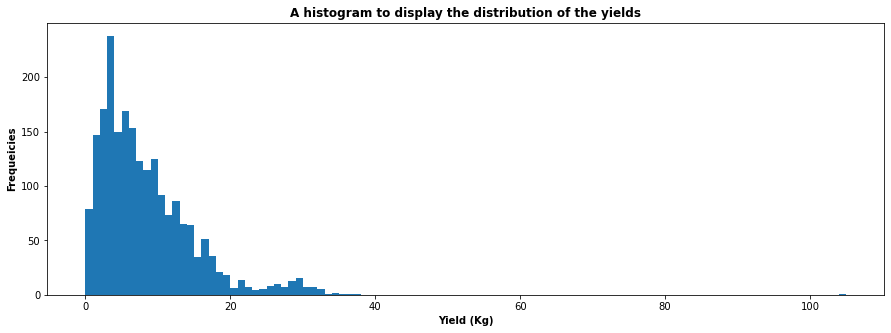

In [64]:
#define the size of bins
binsize = 1
bins = np.arange(0, wheat['yield_kgs'].max()+binsize, binsize)
yieldkgs = wheat['yield_kgs']
#Define plot area
plotarea_size(15,5)
#Plot histogram
plt.hist( x = yieldkgs, bins = bins)
#Add plot information
plot_info('Yield (Kg)','Frequeicies','A histogram to display the distribution of the yields')
#View plot
plt.show()

## Observation:

> There are outliers in the distribution of the yields data. This will require an exploration to the outliers.

In [65]:
# we drop missing values of the yields column in order to analyze the outliers
outlier_analysis = cleaned_focused_data['yield_kgs'].dropna()
outlier_analysis

0       10.560697
1        9.390000
2        5.410000
3        4.705000
4        6.290000
          ...    
2351    11.805000
2352     8.865000
2353    13.340000
2354     9.040000
2355    11.870000
Name: yield_kgs, Length: 2126, dtype: float64

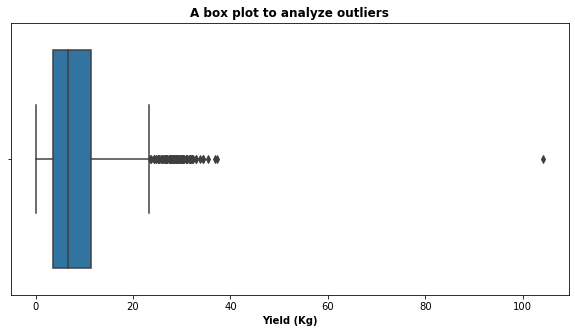

In [66]:
#We define plot area size
plotarea_size(10,5)
#plot a box plot
sns.boxplot(x=outlier_analysis)
#Add plotting information
plot_info('Yield (Kg)','','A box plot to analyze outliers')
#view plot
plt.show()

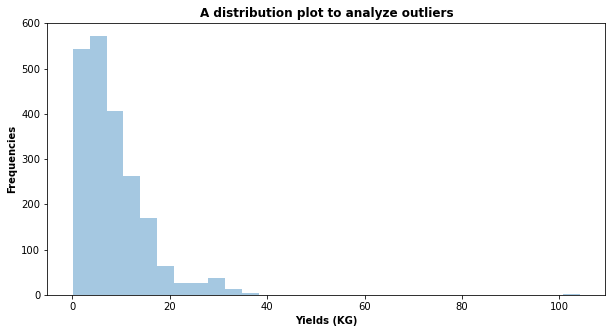

In [67]:
#We plot a distribution plot to analyze the outliers
#Define plot area size
plotarea_size(10,5)
#plot distribution of the data
sns.distplot(outlier_analysis,bins = 30,kde = False)
#Add plotting information
plot_info('Yields (KG)','Frequencies','A distribution plot to analyze outliers')
#View plot
plt.show();

In [68]:
# We view the summary statistics of the yields data
outlier_analysis.describe()

count    2126.000000
mean        8.378229
std         6.780732
min         0.100000
25%         3.521250
50%         6.670000
75%        11.443750
max       104.200000
Name: yield_kgs, dtype: float64

In [69]:
#We find the lower quartile
q1 = outlier_analysis.describe().quantile(0.25)
q1

5.8828125

In [70]:
#We find the upper quartile
q3 = outlier_analysis.describe().quantile(0.75)
q3

34.6328125

In [71]:
#We find the inter-quartile range
iqr = q3-q1
iqr

28.75

In [72]:
upper_limit = q3+ 1.5*iqr
lower_limit = q1- 1.5*iqr

In [73]:
upper_limit

77.7578125

In [74]:
lower_limit

-37.2421875

In [75]:
#We creatte the outier data frame in order to use filters to remove outliers
outlier_analysis = pd.DataFrame(outlier_analysis)
outlier_analysis = outlier_analysis.query('yield_kgs > -37.2421875 & yield_kgs < 77.7578125')
wheat = wheat.query('yield_kgs > -37.2421875 & yield_kgs < 77.7578125')

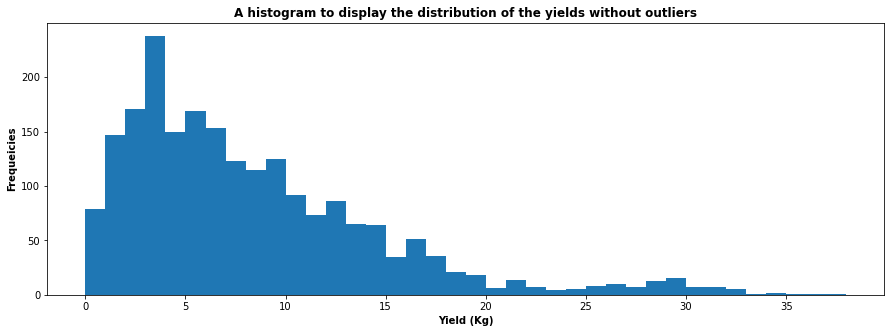

In [76]:
#We plot the distribution without outliers
#We define the bin size
binsize = 1
bins = np.arange(0, outlier_analysis['yield_kgs'].max()+binsize, binsize)
yieldkgs = outlier_analysis['yield_kgs']
#We define plot area
plotarea_size(15,5)
#Plot histogram
plt.hist( x = yieldkgs, bins = bins)
#Add plotting information
plot_info('Yield (Kg)','Frequeicies','A histogram to display the distribution of the yields without outliers')
#view plot
plt.show()

## Observation

> The data is positively skewed. It has a mean of 8.378kgs

In [77]:
wheat.box1_mode_of_planting.value_counts()

rows           1192
broadcasted     933
Name: box1_mode_of_planting, dtype: int64

## Bivariate Analysis

> **Which mode of planting for box 1 has the highest total yields?**

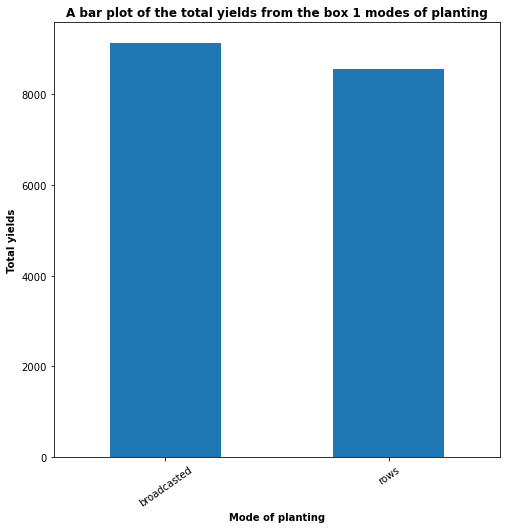

In [78]:
#DEfine plot area
plotarea_size(8,8)
#Plot
plot = wheat.groupby('box1_mode_of_planting')['yield_kgs'].sum().plot.bar();
#Add plotting info
plot_info('Mode of planting','Total yields','A bar plot of the total yields from the box 1 modes of planting');
#rotate xlabels 35 degrees
plt.xticks(rotation = 35);

> **Observation:**
The total yields are higher for broadcasted planting then for rows planting of wheat

> **Which planting method for box 1 has the highest average yield?**

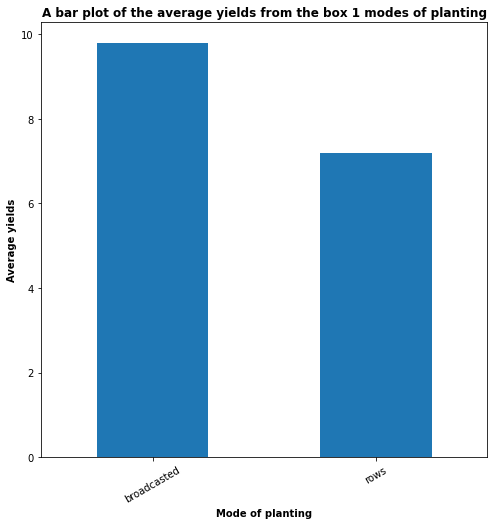

In [79]:
#Define plot area
plotarea_size(8,8);
#create a plot
plot = wheat.groupby('box1_mode_of_planting')['yield_kgs'].mean().plot.bar();
#Add plotting information
plot_info('Mode of planting','Average yields','A bar plot of the average yields from the box 1 modes of planting');
# Rotate the plots 30 degrees
plt.xticks(rotation = 30);

> **Observation:**

The average yields are still higher for broadcsted method over the rows method. The margin is also wider for average yields.  

> **Which mode of planting in box 2 has the highest total yields?**

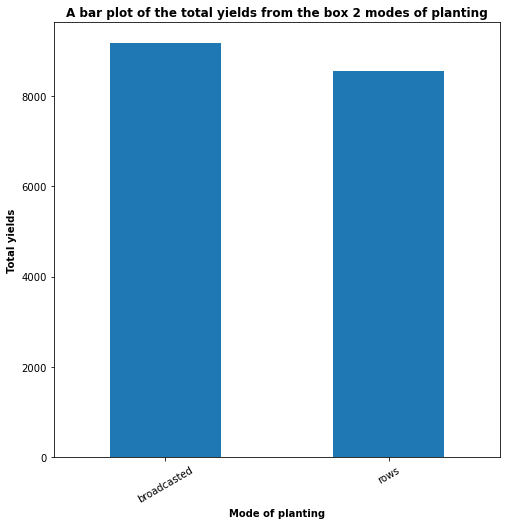

In [80]:
#Define the plot area
plotarea_size(8,8);
#Create a plot
plot = wheat.groupby('box2_mode_of_planting')['yield_kgs'].sum().plot.bar();
#Add plot info
plot_info('Mode of planting','Total yields','A bar plot of the total yields from the box 2 modes of planting');
#rotate the xlabels 30 degrees
plt.xticks(rotation = 30);

> **Observation:**

The results are consstent with box 1 where the total yields are higher for broadcasted than for rows planting

> **Which mode of planting in box 2 has the highest average yields?**

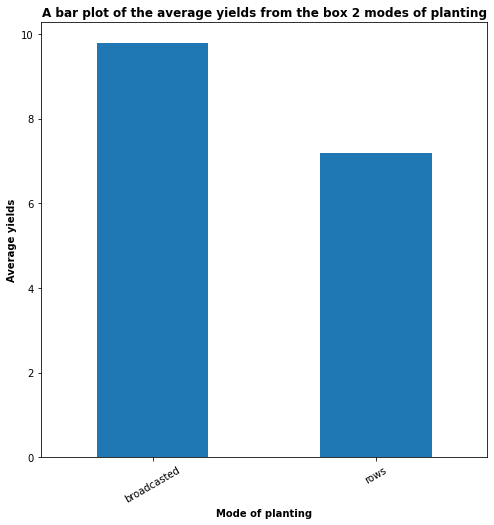

In [81]:
#Define plot area
plotarea_size(8,8)
#Create plot
plot = wheat.groupby('box2_mode_of_planting')['yield_kgs'].mean().plot.bar();
#Add plot info
plot_info('Mode of planting','Average yields','A bar plot of the average yields from the box 2 modes of planting');
#rotate xlabels 30 degrees
plt.xticks(rotation = 30);

> **Observation:**
    
The results are consistent with box 1 where broadcasted planting has a higher average, with the margin slightly wider than the totals.

In [82]:
wheat.box1_mode_of_planting.value_counts()

rows           1192
broadcasted     933
Name: box1_mode_of_planting, dtype: int64

In [83]:
wheat.box2_mode_of_planting.value_counts()

rows           1188
broadcasted     937
Name: box2_mode_of_planting, dtype: int64

> The difference in the totals and average is due to the larger number of farmers using rows planting than broadcasting method.

> **How does distance from water body affect the total wheat yields?**

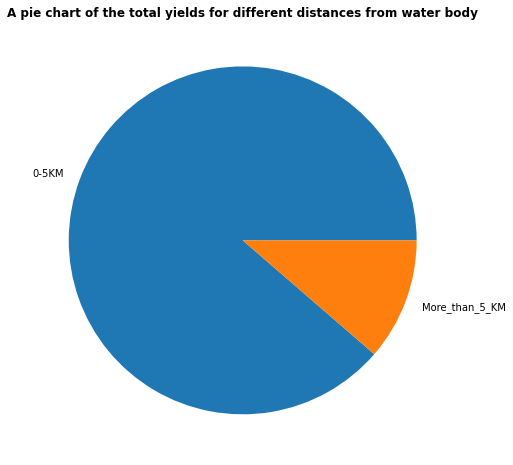

In [84]:
#Define the plot area
plotarea_size(8,8)
#We create a plot
wheat.groupby('distance_to_water_body')['yield_kgs'].sum().plot.pie();
#We add plot info
plot_info('','','A pie chart of the total yields for different distances from water body')


> **Observation:**

A huge part of the total yields comes from farmers who are 0-5KM from the water body.

> **How does distance from water body affect the average wheat yields?**

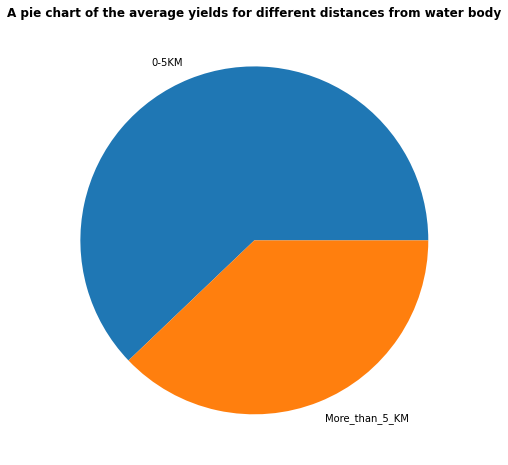

In [85]:
#Define the plot area size
plotarea_size(8,8);
# Create plot
wheat.groupby('distance_to_water_body')['yield_kgs'].mean().plot.pie();
# We add plotting information
plot_info('','','A pie chart of the average yields for different distances from water body');


> **Observation:** 

The average wheat yields are still higher for 0-5km from the water body. This time, the margin is smaller compared to the totals.

In [86]:
wheat.distance_to_water_body.value_counts()

0-5KM             1756
More_than_5_KM     369
Name: distance_to_water_body, dtype: int64

> The difference in the total and the average yields margins is due to the fact that most farmers are within 0-5km from a water body

> **How does altitude affect the yields?**

<Figure size 1080x720 with 0 Axes>

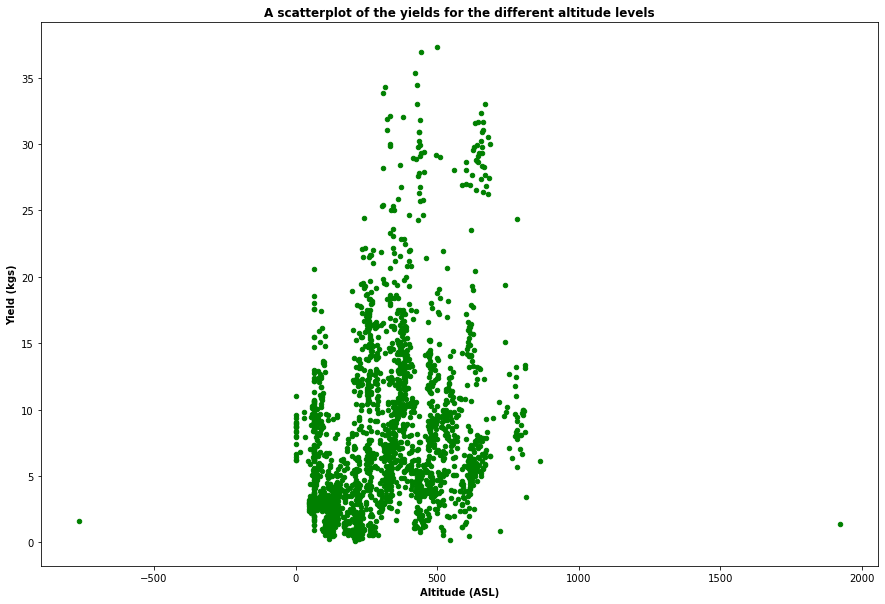

In [87]:
#We define the plot area
plotarea_size(15,10);
#we create a plot
wheat.plot.scatter(x = 'new_altitude',y='yield_kgs',figsize = (15,10), color = 'green');
#We add plot information
plot_info('Altitude (ASL)','Yield (kgs)','A scatterplot of the yields for the different altitude levels');


> **Observation:**

The wheat yields are highest around 500M ASL. The crop does well in altitudes of between 0M and 900M ASL

> **Which farmer state districts have the highest total yields?**

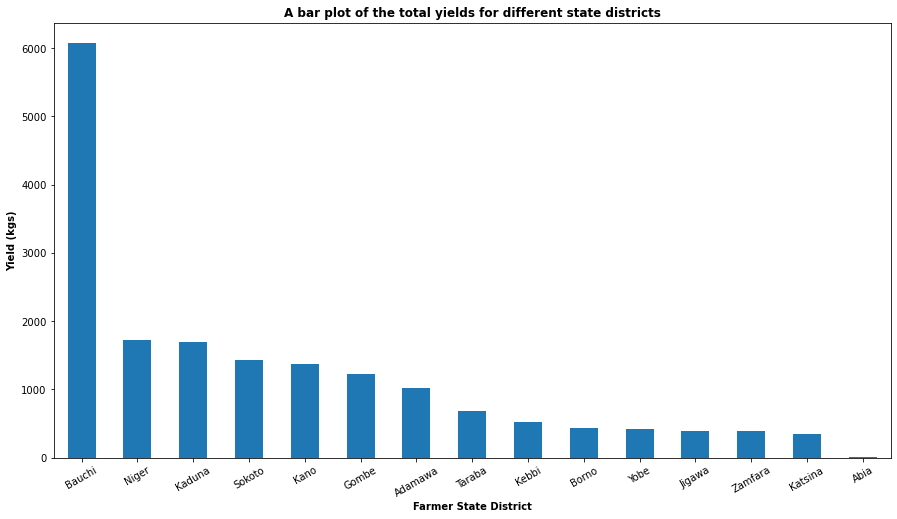

In [88]:
#We create the plot
wheat.groupby('farmer_state_district')['yield_kgs'].sum().sort_values(ascending=False).plot.bar(figsize = (15,8));
#We add plotting information
plot_info('Farmer State District','Yield (kgs)','A bar plot of the total yields for different state districts')
#We rotate the x labels 30 degrees
plt.xticks(rotation = 30);

> **Observation:**
    
Bauchi has the highest total yields while Abia has the lowest total yields.

> **Which state district has the highest average yields?**

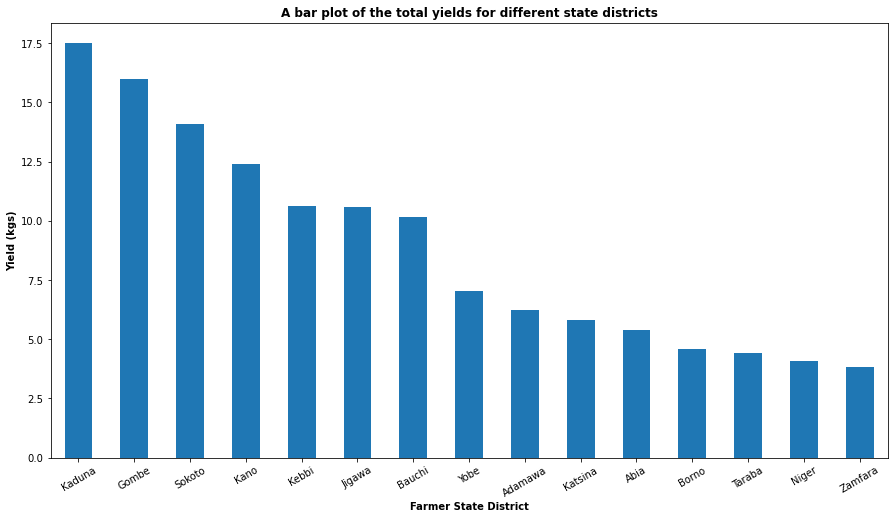

In [89]:
# We create a plot
wheat.groupby('farmer_state_district')['yield_kgs'].mean().sort_values(ascending=False).plot.bar(figsize = (15,8));
#We add plot information
plot_info('Farmer State District','Yield (kgs)','A bar plot of the total yields for different state districts')
#We rotate the x labels 30 degrees.
plt.xticks(rotation = 30);

> **Observation:**
    
On the average yields, Kaduna has the highest yields, while Zamfara has the lowest

In [90]:
wheat.farmer_in_list_or_control.value_counts()

farmer_listed     1549
control_farmer     576
Name: farmer_in_list_or_control, dtype: int64

> **How does the farmer list/control status affect yield?**

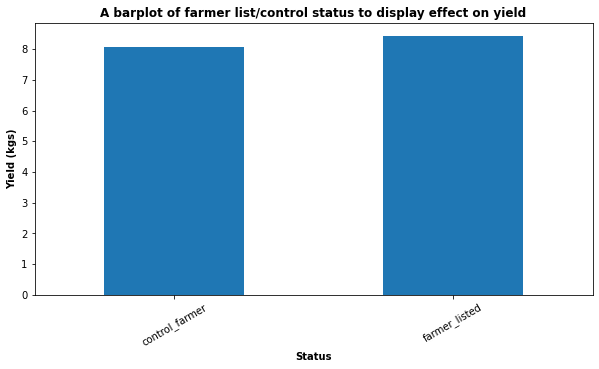

In [91]:
#We define the plot area size
plotarea_size(8,8)
#We create a plot
wheat.groupby('farmer_in_list_or_control')['yield_kgs'].mean().plot.bar(figsize = (10,5));
#We add plotting information
plot_info('Status','Yield (kgs)','A barplot of farmer list/control status to display effect on yield');
#We rotate the x labels
plt.xticks(rotation = 30);

> **Observation:**  

Listed farmers have slightly higher average yields compared to control farmers

## Multivariate Analysis

> **How does farmer list/control status affect the yield given a broadcasting method?**

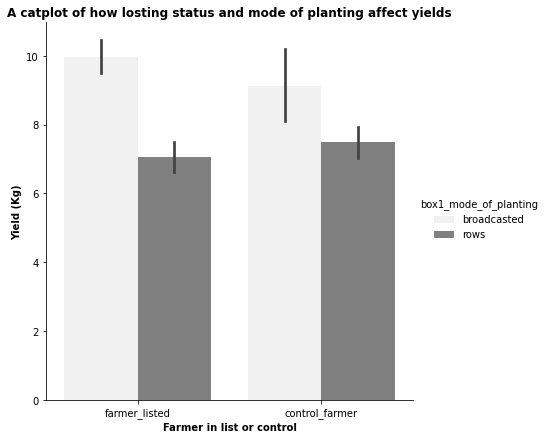

In [92]:
# We create the catplot
sns.catplot(
    data=wheat, x='farmer_in_list_or_control', y="yield_kgs", hue="box1_mode_of_planting",
    kind="bar", height=6, aspect=1,color='grey'
);
# We add plotting information
plot_info('Farmer in list or control', 'Yield (Kg)','A catplot of how losting status and mode of planting affect yields')

> **Observation:**
    
Farmers who are listed and use broadcasted planting are have higher yields than control farmers who use broadcast planting.
Farmers who are listed and use rows have less yields compared to control farmers who use row planting

> **How does irrigation and distsnce to water body affect yield?**

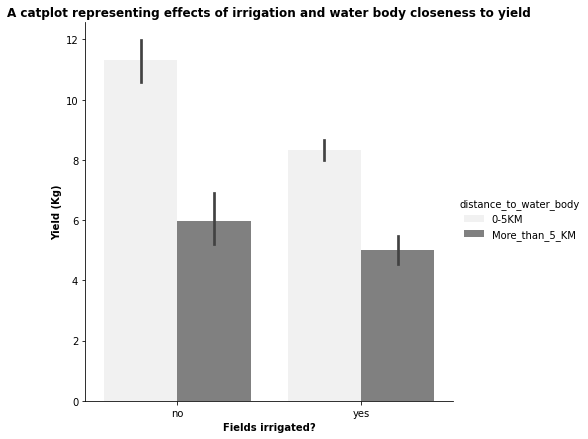

In [93]:
#We create a catplot for the data
sns.catplot(
    data=wheat, x='field_irrigated', y="yield_kgs", hue="distance_to_water_body",color='grey',
    kind="bar", height=6, aspect=1,
);
#We add plotting information
plot_info('Fields irrigated?','Yield (Kg)','A catplot representing effects of irrigation and water body closeness to yield')

> **Observation:**
    
Irrigations in areas 0-5km to water body lead to reduced yields, while irrigations around areas more than 5km from water bodies lead to increased yield.

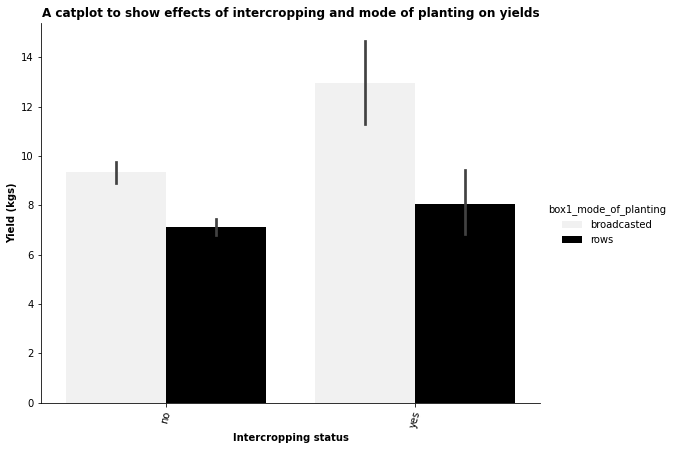

In [94]:
#We create the plot
districtplot =sns.catplot( data=wheat, x='intercropping', y="yield_kgs",
            hue="box1_mode_of_planting", kind="bar", height= 6, aspect=1.3, color = 'black')
#We rotate the xlabel
districtplot.set_xticklabels(rotation=75)
# We add plotting information
plot_info('Intercropping status','Yield (kgs)','A catplot to show effects of intercropping and mode of planting on yields')


> **Observation:**

When crops are planted solo, broadcasting method procuces higher yields than rows method, with a small margin.
When crops are intercropped, briadcast method significantly increases the yield, with a higher margin compared to rows method

##  How are the plantations distributed on a map?

In [95]:
#We create a spartial dataframe
spartial_data = cleaned_focused_data
spartial_data.sample(8)

,case_id,client_name,distance_to_water_body,insured_crop,farmer_state_district,farmer_in_list_or_control,farmer_verified,field_irrigated,intercropping,crops_kept_in_separate_bags,box1_mode_of_planting,box2_mode_of_planting,type_of_irrigation_system,other_crops_names,name_of_enumerator,yield_kgs,new_latitude,new_longitude,new_altitude,new_accuracy
782,d7f7b85b-dd3a-4947-a1c7-6182a16d304c,A,0-5KM,wheat,Adamawa,farmer_listed,farmer_verified,yes,no,yes,rows,rows,borehole,NaN,nig177,6.095,9.290217,12.458038,168.39,3.90
172,75699e4c-c58a-4002-ba0c-71c9bee93246,A,More_than_5_KM,wheat,Katsina,control_farmer,NaN,yes,no,NaN,broadcasted,broadcasted,tube_well,NaN,nig190,NaN,11.831455,7.601801,589.90,4.91
953,5d691737-80f6-4d10-94bf-1dc7c4e97aff,A,0-5KM,wheat,Kano,farmer_listed,farmer_verified,no,no,yes,rows,rows,NaN,NaN,nig045,28.990,11.618723,8.852054,510.18,5.67
920,a632f6d7-296d-4fba-a8bc-89e3adcb4d62,A,More_than_5_KM,wheat,Kano,farmer_listed,farmer_verified,yes,no,yes,broadcasted,broadcasted,tube_well,NaN,nig047,1.235,12.002637,8.894693,427.18,5.00
1917,e49082b6-d962-4f77-abda-cc81634f71e9,A,0-5KM,wheat,Bauchi,farmer_listed,farmer_verified,no,no,NaN,NaN,NaN,NaN,NaN,nig022,NaN,9.910733,9.896662,509.20,4.09
1872,42f425a5-e5a9-4e56-9f8c-8ba6f0b0d1dc,A,0-5KM,wheat,Bauchi,farmer_listed,farmer_verified,yes,no,yes,rows,rows,tube_well,NaN,nig028,11.615,9.990191,9.693320,538.29,4.05
917,a3714c5e-46a5-4d88-ae27-ffbc3c7549fa,A,More_than_5_KM,wheat,Kano,farmer_listed,farmer_verified,yes,no,yes,broadcasted,broadcasted,tube_well,NaN,nig047,6.195,12.084407,9.158425,417.14,5.00
261,13c335a3-604d-4fbd-9273-44cf996cc7d1,A,More_than_5_KM,wheat,Borno,farmer_listed,farmer_verified,yes,no,yes,rows,rows,borehole,NaN,nig173,2.575,11.903655,13.228080,303.70,8.40


In [96]:
# view the number of unique values 
spartial_data.nunique()

case_id                        2356
client_name                       1
distance_to_water_body            2
insured_crop                      1
farmer_state_district            15
farmer_in_list_or_control         2
farmer_verified                   1
field_irrigated                   2
intercropping                     2
crops_kept_in_separate_bags       2
box1_mode_of_planting             2
box2_mode_of_planting             2
type_of_irrigation_system        21
other_crops_names                 4
name_of_enumerator               78
yield_kgs                      1713
new_latitude                   2300
new_longitude                  2302
new_altitude                   1878
new_accuracy                    425
dtype: int64

In [97]:
#Count the distances from the water body
wheat.distance_to_water_body.value_counts()

0-5KM             1756
More_than_5_KM     369
Name: distance_to_water_body, dtype: int64

In [98]:
# We check to find mussing values of thatitude column
spartial_data.query('new_latitude.isna()')

,case_id,client_name,distance_to_water_body,insured_crop,farmer_state_district,farmer_in_list_or_control,farmer_verified,field_irrigated,intercropping,crops_kept_in_separate_bags,box1_mode_of_planting,box2_mode_of_planting,type_of_irrigation_system,other_crops_names,name_of_enumerator,yield_kgs,new_latitude,new_longitude,new_altitude,new_accuracy


In [99]:
#We import the map package
import folium
#Define the center location for the map
centre_location = [spartial_data.new_latitude.mean(),spartial_data.new_longitude.mean()]

In [100]:
#We create a map
map1 = folium.Map(location = centre_location,
                  tiles = 'https://{s}.basemaps.cartocdn.com/rastertiles/voyager_nolabels/{z}/{x}/{y}{r}.png',
                  attr='CartoDB.Voyager',zoom_start = 6, control_scale = True)

In [101]:
#We use a loop to fill the markers
for index, loc in spartial_data.iterrows():
    folium.CircleMarker([loc['new_latitude'],loc['new_longitude']], radius = 2, weight = 5, 
                        popup = loc['yield_kgs']).add_to(map1)
    
folium.LayerControl().add_to(map1)
#display the map
map1

> **Observation:**
    
The plantations are far from the ocean. They are aligned along rivers, with few of them close to lakes